In [ ]:
import os
os.system('pip install -U pip setuptools wheel')
os.system('pip install -U spacy')
os.system('python -m spacy download en_core_web_sm')

0

In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import nltk
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
from nltk import FreqDist

In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
len(positive_tweets), len(negative_tweets)

(5000, 5000)

In [ ]:
positive_tweets[:50]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

## TOkenizing wokds

In [ ]:
def get_tokens(tweets):
  generated_tokens = []
  for i in tweets:
    doc = nlp(i)
    for sent in doc.sents:
      tokens = []
      for token in sent:
        tokens.append(token)
      generated_tokens.append(tokens)
    
  return generated_tokens

In [ ]:
pos_tokens = get_tokens(positive_tweets)
neg_tokens = get_tokens(negative_tweets)

In [ ]:
pos_tokens[:50]

[[#,
  FollowFriday,
  @France_Inte,
  @PKuchly57,
  @Milipol_Paris,
  for,
  being,
  top,
  engaged,
  members,
  in,
  my,
  community,
  this,
  week,
  :)],
 [@Lamb2ja, Hey, James, !],
 [How,
  odd,
  :/,
  Please,
  call,
  our,
  Contact,
  Centre,
  on,
  02392441234,
  and,
  we,
  will,
  be,
  able,
  to,
  assist,
  you,
  :)],
 [Many, thanks, !],
 [@DespiteOfficial, we, had, a, listen, last, night, :)],
 [As, You, Bleed, is, an, amazing, track, .],
 [When, are, you, in, Scotland, ?, !],
 [@97sides, CONGRATS, :)],
 [yeaaaah, yippppy, !, !, !],
 [ ,
  my,
  accnt,
  verified,
  rqst,
  has,
  succeed,
  got,
  a,
  blue,
  tick,
  mark,
  on,
  my,
  fb,
  profile,
  :),
  in,
  15,
  days],
 [@BhaktisBanter,
  @PallaviRuhail,
  This,
  one,
  is,
  irresistible,
  :),
  ,
  #,
  FlipkartFashionFriday,
  http://t.co/EbZ0L2VENM],
 [We, do, n't, like, to, keep, our, lovely, customers, waiting, for, long, !],
 [We, hope, you, enjoy, !],
 [Happy, Friday, !],
 [-, LWWF, :)],
 [ht

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import re

## Removing noises

In [ ]:
def remove_noise(tweet_tokens, stop_words=()):
  cleaned_tokens = []

  for token in tweet_tokens:
    if token.pos_ in ['PROPN', 'ADJ', 'NOUN', 'VERB']:
      token = token.lemma_
      token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                        '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
      token = re.sub("(@[A-Za-z0-9_]+)","", token)

      if len(token) > 0 and token not in punctuation and token.lower() not in stop_words:
        cleaned_tokens.append(token.lower())
  return cleaned_tokens

In [ ]:
stopwords = list(STOP_WORDS)  
positive_tweet_tokens = []
for token in pos_tokens:
  positive_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
positive_tweet_tokens[:50]

[['followfriday', 'engaged', 'member', 'community', 'week'],
 ['james'],
 ['odd', 'contact', 'centre', 'able', 'assist'],
 ['thank'],
 ['listen', 'night'],
 ['bleed', 'amazing', 'track'],
 ['scotland'],
 ['congrats'],
 ['yeaaaah', 'yippppy'],
 ['verify', 'rqst', 'succeed', 'blue', 'tick', 'mark', 'fb', 'profile', 'day'],
 ['irresistible', 'flipkartfashionfriday'],
 ['like', 'lovely', 'customer', 'wait'],
 ['hope', 'enjoy'],
 ['happy', 'friday'],
 ['lwwf'],
 [],
 [],
 ['second', 'thought', '’', 'time', 'dd'],
 ['new', 'short', 'enter', 'system'],
 ['sheep', 'buy'],
 ['jgh', 'bayan'],
 ['act',
  'mischievousness',
  'etl',
  'layer',
  'house',
  'warehousing',
  'app',
  'katamari'],
 ['imply', 'p.'],
 ['followfriday', 'influencer', 'community', 'week'],
 ['love', 'big', '....', 'juicy', 'selfie'],
 ['follow', 'amp', 'follow', 'u'],
 ['perfect', 'know', 'wait'],
 ['great',
  'new',
  'opportunity',
  'junior',
  'triathlete',
  'age',
  'gatorade',
  'series'],
 ['entry'],
 ['lay', 'gre

## Doing necessary preprocessing

In [ ]:
negative_tweet_tokens = []
for token in neg_tokens:
  negative_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
def join_texts(tokens):
  return ' '.join(tokens)

In [ ]:
for tokens in range(len(negative_tweet_tokens)):
  negative_tweet_tokens[tokens] = join_texts(negative_tweet_tokens[tokens])

In [ ]:
for tokens in range(len(positive_tweet_tokens)):
  positive_tweet_tokens[tokens] = join_texts(positive_tweet_tokens[tokens])

In [ ]:
while("" in positive_tweet_tokens) :
    positive_tweet_tokens.remove("")

In [ ]:
while("" in negative_tweet_tokens) :
    negative_tweet_tokens.remove("")

In [ ]:
# testing purpose
res = max(positive_tweet_tokens, key = len)
len(res)

111

In [ ]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
      doc_tokens = nlp(tokens)
      for sent in doc_tokens.sents:
        for token in sent:
          yield token.text

In [ ]:
all_neg_word = get_all_words(negative_tweet_tokens)
all_neg_word = list(all_neg_word)

In [ ]:
all_neg_word

['hopeless',
 'kid',
 'section',
 'ikea',
 'cute',
 'shame',
 'month',
 'heart',
 'slide',
 'waste',
 'basket',
 'hate',
 'japanese',
 'bani',
 'dang',
 'start',
 'week',
 'work',
 'baby',
 'face',
 'smile',
 'work',
 'neighbour',
 'motor',
 'ask',
 'hate',
 'update',
 'search',
 'why',
 '?',
 ':(',
 '"',
 'sialan',
 'athabasca',
 'glacier',
 'athabasca',
 'glaci',
 'jasper',
 'jaspernationalpark',
 'alberta',
 'explorealberta',
 'good',
 'm&amp;g',
 'idea',
 'meet',
 'mare',
 'ivan',
 'happy',
 'trip',
 'safe',
 'tired',
 'hahahah',
 'knee',
 'replacement',
 'amp',
 'day',
 'ouch',
 'relate',
 'sweet',
 'sour',
 'kind',
 'bi',
 'polar',
 'people',
 'life',
 'life',
 'pleasse',
 'm',
 'sure',
 'tho',
 'feel',
 'stupid',
 'grasp',
 'basic',
 'digital',
 'painting',
 'research',
 'help',
 'good',
 'lord',
 'feel',
 'lonely',
 'talk',
 'guy',
 'girl',
 'assignment',
 'project',
 'want',
 'play',
 'video',
 'game',
 'watch',
 'movie',
 'choreographing',
 'hard',
 'email',
 'link',
 'availa

In [ ]:
all_pos_word = get_all_words(positive_tweet_tokens)
all_pos_word = list(all_pos_word)

In [ ]:
all_pos_word

['followfriday',
 'engaged',
 'member',
 'community',
 'week',
 'james',
 'odd',
 'contact',
 'centre',
 'able',
 'assist',
 'thank',
 'listen',
 'night',
 'bleed',
 'amazing',
 'track',
 'scotland',
 'congrats',
 'yeaaaah',
 'yippppy',
 'verify',
 'rqst',
 'succeed',
 'blue',
 'tick',
 'mark',
 'fb',
 'profile',
 'day',
 'irresistible',
 'flipkartfashionfriday',
 'like',
 'lovely',
 'customer',
 'wait',
 'hope',
 'enjoy',
 'happy',
 'friday',
 'lwwf',
 'second',
 'thought',
 '’',
 'time',
 'dd',
 'new',
 'short',
 'enter',
 'system',
 'sheep',
 'buy',
 'jgh',
 'bayan',
 'act',
 'mischievousness',
 'etl',
 'layer',
 'house',
 'warehousing',
 'app',
 'katamari',
 'imply',
 'p.',
 'followfriday',
 'influencer',
 'community',
 'week',
 'love',
 'big',
 '....',
 'juicy',
 'selfie',
 'follow',
 'amp',
 'follow',
 'u',
 'perfect',
 'know',
 'wait',
 'great',
 'new',
 'opportunity',
 'junior',
 'triathlete',
 'age',
 'gatorade',
 'series',
 'entry',
 'lay',
 'greeting',
 'card',
 'range',
 'p

## EDA

In [ ]:
len(set(all_pos_word)), len(all_pos_word)

(6438, 22297)

In [ ]:
freq_dist_pos = FreqDist(all_pos_word)
print(freq_dist_pos.most_common(10))

[('thank', 621), ('follow', 369), ('love', 338), ('good', 288), ('day', 243), ('u', 207), ('happy', 199), ('great', 175), ('amp', 167), ('know', 163)]


In [ ]:
freq_dist_neg = FreqDist(all_neg_word)
print(freq_dist_neg.most_common(10))

[('miss', 295), ('》', 280), (':(((', 278), ('want', 246), ('♛', 175), ('time', 160), ('follow', 159), ('u', 151), ('day', 148), ('love', 143)]


In [ ]:
import pandas as pd

In [ ]:
all_pos_word_df = pd.DataFrame(freq_dist_pos.most_common(50), columns=['words', 'count'])
all_pos_word_df.head()

,words,count
0,thank,621
1,follow,369
2,love,338
3,good,288
4,day,243


In [ ]:
all_neg_word_df = pd.DataFrame(freq_dist_neg.most_common(50), columns=['words', 'count'])
all_neg_word_df.head()

,words,count
0,miss,295
1,》,280
2,:(((,278
3,want,246
4,♛,175


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
all_pos_word_df.value_counts()

words       count
amp         167      1
thing       69       1
morning     101      1
need        75       1
new         147      1
nice        99       1
night       69       1
people      52       1
smile       60       1
start       59       1
stat        60       1
thank       621      1
think       91       1
arrive      66       1
time        122      1
today       116      1
tweet       63       1
u           207      1
unfollower  60       1
wait        68       1
want        97       1
week        84       1
weekend     76       1
welcome     66       1
lt;3        110      1
lovely      59       1
love        338      1
lot         86       1
birthday    74       1
check       53       1
come        78       1
day         243      1
enjoy       79       1
follow      369      1
follower    78       1
friday      115      1
friend      67       1
fun         58       1
good        288      1
great       175      1
guy         58       1
happy       199      1
hope        126 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12299 missing from current font.
  font.set_text(s, 0, flags=flags)


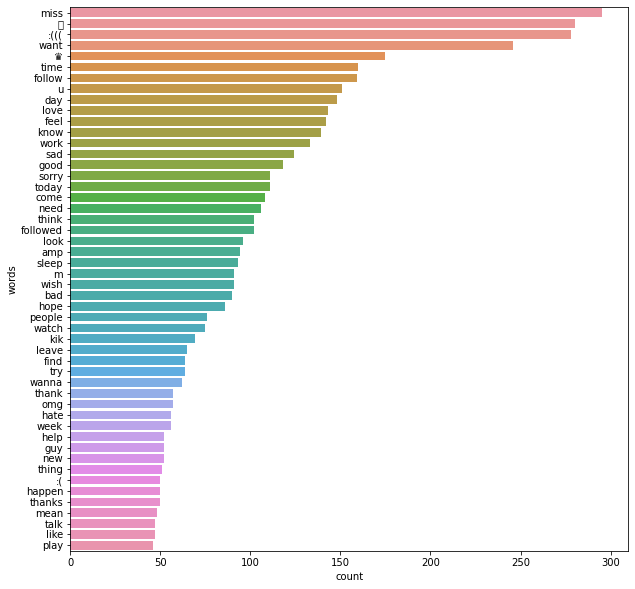

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='count',y='words', data=all_neg_word_df)

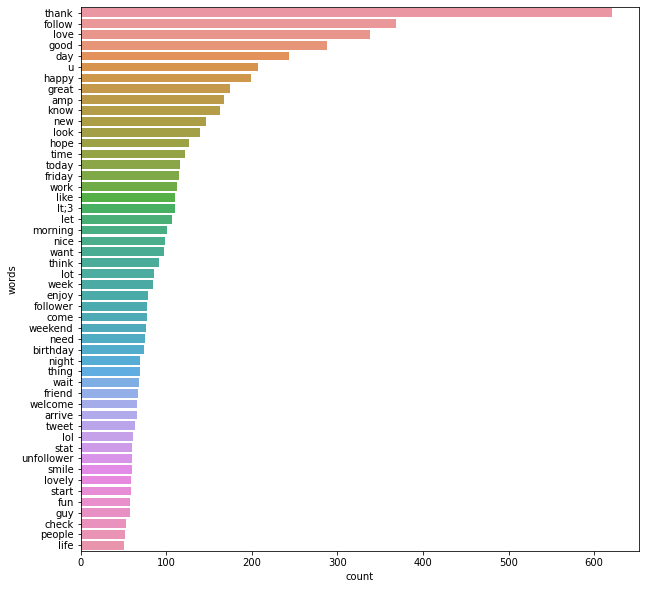

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='count',y='words', data=all_pos_word_df)

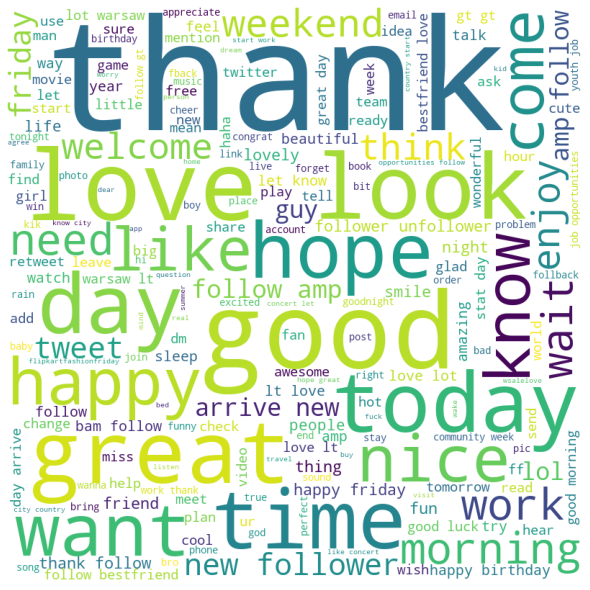

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(all_pos_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

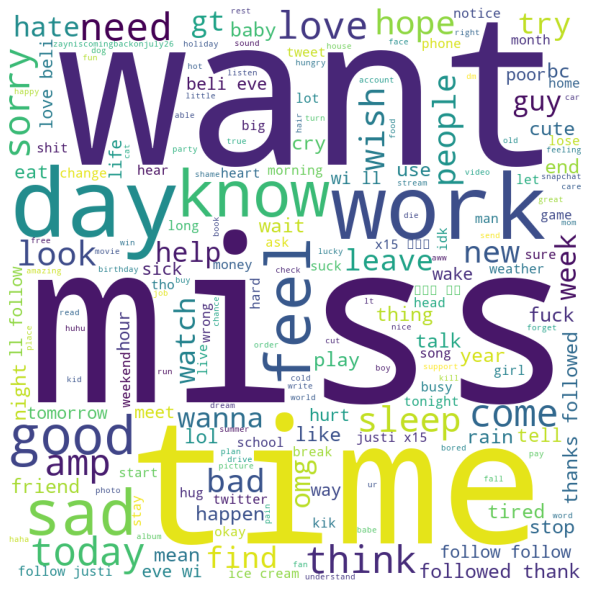

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(all_neg_word))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Data Preparation and Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
positive_tweet_df = pd.DataFrame(positive_tweet_tokens)
negative_tweet_df = pd.DataFrame(negative_tweet_tokens)

In [ ]:
positive_tweet_df['target'] = positive_tweet_df.shape[0] * [1]

In [ ]:
negative_tweet_df['target'] = negative_tweet_df.shape[0] * [0]

In [ ]:
dataset = pd.concat([positive_tweet_df, negative_tweet_df])
dataset.head()

,0,target
0,followfriday engaged member community week,1
1,james,1
2,odd contact centre able assist,1
3,thank,1
4,listen night,1


In [ ]:
dataset.rename({0:'text'}, inplace=True, axis=1)
dataset.head()

,text,target
0,followfriday engaged member community week,1
1,james,1
2,odd contact centre able assist,1
3,thank,1
4,listen night,1


In [ ]:
X = dataset['text']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size=.2, random_state=42)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))

In [ ]:
for i in X_train.take(5):
  print(i)

(<tf.Tensor: shape=(), dtype=string, numpy=b'glad'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'taste bad'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'sleep need'>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'meet convener look'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'cant watch tonights andromeda'>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
X_test = tf.data.Dataset.from_tensor_slices((tf.constant(X_test), tf.constant(y_test)))

In [ ]:
X_train = X_train.shuffle(10000).batch(64).prefetch(tf.data.AUTOTUNE)
X_test = X_test.batch(10000).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import utils

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=5000)

encoder.adapt(X_train.map(lambda text, target: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:50]

array(['', '[UNK]', 'thank', 'follow', 'love', 'good', 'day', 'u', 'want',
       'miss', 'know', 'time', 'amp', 'work', '》', 'look', 'happy',
       'today', 'hope', 'new', 'need', 'great', 'think', 'feel', 'come',
       'like', 'let', '♛', 'week', 'sleep', 'sorry', 'wish', 'lt3', 'sad',
       'people', 'nice', 'morning', 'friday', 'thing', 'watch', 'm',
       'lot', 'wait', 'bad', 'night', 'lol', 'try', 'guy', 'start',
       'friend'], dtype='<U35')

In [ ]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim = len(encoder.get_vocabulary()), # 1000
    output_dim = 64, # 64
    mask_zero = True
)

In [ ]:
Layers = [
          encoder, # text vectorization
          embedding_layer, # embedding
          tf.keras.layers.Bidirectional(
              tf.keras.layers.LSTM(64)
          ),
          tf.keras.layers.Dense(64, activation="relu"),
          tf.keras.layers.Dense(1)
]

model = tf.keras.Sequential(Layers)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # 
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=["accuracy"]
)

In [ ]:
BASE_LOG_DIR = "base_log_dir"
TRAINED_MODEL_DIR = os.path.join(BASE_LOG_DIR, "models")
CHECKPOINT_DIR = os.path.join(BASE_LOG_DIR, "ckpt")
TB_ROOT_LOG_DIR = os.path.join(BASE_LOG_DIR, "tb_log_dir")

In [ ]:
import time
def callbacks(base_dir="."):

  # tensorboard callbacks - 
  unique_log = time.asctime().replace(" ", "_").replace(":", "")
  tensorboard_log_dir = os.path.join(TB_ROOT_LOG_DIR, unique_log)
  os.makedirs(tensorboard_log_dir, exist_ok=True)

  tb_cb = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_log_dir)

  # ckpt callback
  ckpt_file = os.path.join(CHECKPOINT_DIR, "model")
  os.makedirs(CHECKPOINT_DIR, exist_ok=True)

  ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
      filepath=ckpt_file,
      save_best_only=True
  )

  callback_list = [
                   tb_cb,
                   ckpt_cb
  ]

  return callback_list

In [ ]:
callback_list = callbacks()

In [ ]:
history = model.fit(X_train,
                    epochs=50,
                    validation_data=X_test,
                    validation_steps=50,
                    callbacks=callback_list)

Epoch 1/50
170/171 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.4806WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


INFO:tensorflow:Assets written to: base_log_dir/ckpt/model/assets


171/171 [==============================] - 40s 190ms/step - loss: 0.6909 - accuracy: 0.4806 - val_loss: 0.6851 - val_accuracy: 0.4685
Epoch 2/50
171/171 [==============================] - ETA: 0s - loss: 0.6572 - accuracy: 0.5209WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.6572 - accuracy: 0.5209
Epoch 3/50
170/171 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.6869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.5503 - accuracy: 0.6869
Epoch 4/50
170/171 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.7506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.4824 - accuracy: 0.7505
Epoch 5/50
169/171 [============================>.] - ETA: 0s - loss: 0.4408 - accuracy: 0.7844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.4405 - accuracy: 0.7842
Epoch 6/50
170/171 [============================>.] - ETA: 0s - loss: 0.4086 - accuracy: 0.8066WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 27ms/step - loss: 0.4085 - accuracy: 0.8067
Epoch 7/50
170/171 [============================>.] - ETA: 0s - loss: 0.3839 - accuracy: 0.8200WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.3838 - accuracy: 0.8200
Epoch 8/50
169/171 [============================>.] - ETA: 0s - loss: 0.3655 - accuracy: 0.8339WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.3649 - accuracy: 0.8341
Epoch 9/50
169/171 [============================>.] - ETA: 0s - loss: 0.3501 - accuracy: 0.8379WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.3497 - accuracy: 0.8377
Epoch 10/50
169/171 [============================>.] - ETA: 0s - loss: 0.3365 - accuracy: 0.8434WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.3368 - accuracy: 0.8434
Epoch 11/50
168/171 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8482WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 6s 35ms/step - loss: 0.3263 - accuracy: 0.8483
Epoch 12/50
168/171 [============================>.] - ETA: 0s - loss: 0.3174 - accuracy: 0.8508WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.3183 - accuracy: 0.8503
Epoch 13/50
170/171 [============================>.] - ETA: 0s - loss: 0.3115 - accuracy: 0.8539WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 27ms/step - loss: 0.3114 - accuracy: 0.8539
Epoch 14/50
170/171 [============================>.] - ETA: 0s - loss: 0.3057 - accuracy: 0.8545WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 26ms/step - loss: 0.3056 - accuracy: 0.8546
Epoch 15/50
168/171 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.8559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.3011 - accuracy: 0.8557
Epoch 16/50
168/171 [============================>.] - ETA: 0s - loss: 0.2966 - accuracy: 0.8584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2972 - accuracy: 0.8579
Epoch 17/50
169/171 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.8597WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.2924 - accuracy: 0.8601
Epoch 18/50
171/171 [==============================] - ETA: 0s - loss: 0.2898 - accuracy: 0.8623WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2898 - accuracy: 0.8623
Epoch 19/50
170/171 [============================>.] - ETA: 0s - loss: 0.2873 - accuracy: 0.8618WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2874 - accuracy: 0.8616
Epoch 20/50
168/171 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.8659WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2843 - accuracy: 0.8656
Epoch 21/50
169/171 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8629WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2817 - accuracy: 0.8629
Epoch 22/50
171/171 [==============================] - ETA: 0s - loss: 0.2796 - accuracy: 0.8669WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2796 - accuracy: 0.8669
Epoch 23/50
167/171 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.2769 - accuracy: 0.8665
Epoch 24/50
168/171 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8700WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 26ms/step - loss: 0.2749 - accuracy: 0.8702
Epoch 25/50
170/171 [============================>.] - ETA: 0s - loss: 0.2733 - accuracy: 0.8687WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2732 - accuracy: 0.8687
Epoch 26/50
169/171 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8706WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.2710 - accuracy: 0.8704
Epoch 27/50
171/171 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8722WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2693 - accuracy: 0.8722
Epoch 28/50
167/171 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.8714WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2681 - accuracy: 0.8715
Epoch 29/50
170/171 [============================>.] - ETA: 0s - loss: 0.2662 - accuracy: 0.8717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2661 - accuracy: 0.8718
Epoch 30/50
170/171 [============================>.] - ETA: 0s - loss: 0.2632 - accuracy: 0.8744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2632 - accuracy: 0.8743
Epoch 31/50
168/171 [============================>.] - ETA: 0s - loss: 0.2612 - accuracy: 0.8743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 24ms/step - loss: 0.2611 - accuracy: 0.8742
Epoch 32/50
170/171 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.8760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2589 - accuracy: 0.8760
Epoch 33/50
169/171 [============================>.] - ETA: 0s - loss: 0.2560 - accuracy: 0.8770WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 26ms/step - loss: 0.2567 - accuracy: 0.8768
Epoch 34/50
169/171 [============================>.] - ETA: 0s - loss: 0.2553 - accuracy: 0.8778WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2556 - accuracy: 0.8779
Epoch 35/50
170/171 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8790WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 27ms/step - loss: 0.2534 - accuracy: 0.8790
Epoch 36/50
170/171 [============================>.] - ETA: 0s - loss: 0.2510 - accuracy: 0.8778WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2511 - accuracy: 0.8777
Epoch 37/50
170/171 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.8793WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2485 - accuracy: 0.8793
Epoch 38/50
167/171 [============================>.] - ETA: 0s - loss: 0.2461 - accuracy: 0.8815WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2459 - accuracy: 0.8811
Epoch 39/50
170/171 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.8822WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2442 - accuracy: 0.8821
Epoch 40/50
170/171 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.8820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2420 - accuracy: 0.8819
Epoch 41/50
171/171 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.8853WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 26ms/step - loss: 0.2398 - accuracy: 0.8853
Epoch 42/50
168/171 [============================>.] - ETA: 0s - loss: 0.2370 - accuracy: 0.8861WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2373 - accuracy: 0.8854
Epoch 43/50
170/171 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.8862WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2352 - accuracy: 0.8863
Epoch 44/50
171/171 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.8841WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 27ms/step - loss: 0.2327 - accuracy: 0.8841
Epoch 45/50
170/171 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.8860WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2319 - accuracy: 0.8861
Epoch 46/50
171/171 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.8876WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 8s 46ms/step - loss: 0.2337 - accuracy: 0.8876
Epoch 47/50
169/171 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.8875WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 27ms/step - loss: 0.2273 - accuracy: 0.8877
Epoch 48/50
170/171 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.8901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 5s 26ms/step - loss: 0.2254 - accuracy: 0.8900
Epoch 49/50
171/171 [==============================] - ETA: 0s - loss: 0.2235 - accuracy: 0.8905WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2235 - accuracy: 0.8905
Epoch 50/50
170/171 [============================>.] - ETA: 0s - loss: 0.2225 - accuracy: 0.8922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


171/171 [==============================] - 4s 25ms/step - loss: 0.2226 - accuracy: 0.8922


In [ ]:
def get_plot(history, metric):
  history_obj = history.history
  plt.plot(history_obj[metric])
  plt.plot(history_obj[f'val_{metric}'])
  plt.xlabel("Epochs -->")
  plt.ylabel(f"{metric} -->")
  plt.legend([metric, f'val_{metric}'])

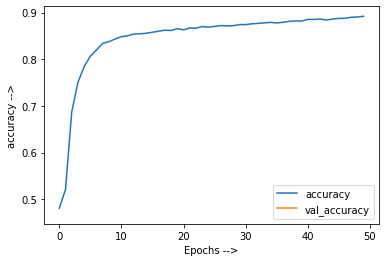

In [ ]:
get_plot(history, metric="accuracy")

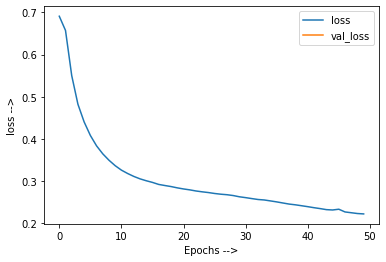

In [ ]:
get_plot(history, metric="loss")

## Evaluating the model

In [ ]:
# X_holdout = tf.data.Dataset.from_tensor_slices(tf.constant(X_holdout))

In [ ]:
X_holdout = X_holdout.reset_index()

In [ ]:
X_holdout.drop('index', axis=1, inplace=True)

In [ ]:
for i in X_holdout['text']:
  print(i)

In [ ]:
pred = [1 if i>0  else 0 for i in model.predict(X_holdout['text'])]

In [ ]:
pred

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_holdout, pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       288
           1       0.68      0.68      0.68       257

    accuracy                           0.70       545
   macro avg       0.70      0.70      0.70       545
weighted avg       0.70      0.70      0.70       545



In [ ]:
poritive_test_data = ['Hope you have a wonderful rest of your day!💕💚🖤🤍',
                      'Happy Saturday from Obanai & Mitsuri! 💜💚',
                      'Its all about striving for the best & moving forward 👊 ',
                      '''Hardik Pandya said, I ll make sure whatever I did for Gujarat Titans, I ll be able to do for India. The old Hardik will be back''',
                      'like for a cool animation! ',
                      '''Love this little guy! #HollowKnight #game #pixelart #drawing #art #aseprite #fanart''',
'''Playing games, taking names. LETS GOOOOOOOOO #twitch #stream #live #livetwitch #smallstreamersconnect #playing #gaming #game''']

In [ ]:
token_pred = get_tokens(poritive_test_data)

In [ ]:
stopwords = list(STOP_WORDS)  
pred_tweet_tokens = []
for token in token_pred:
  pred_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
for tokens in range(len(pred_tweet_tokens)):
  pred_tweet_tokens[tokens] = join_texts(pred_tweet_tokens[tokens])

In [ ]:
while("" in pred_tweet_tokens) :
    pred_tweet_tokens.remove("")

In [ ]:
pred_x = pd.DataFrame(pred_tweet_tokens)

In [ ]:
pred_x = tf.data.Dataset.from_tensor_slices(tf.constant(pred_x))

In [ ]:
for i in pred_x:
  print("positive" if model.predict(i)[0][0]>0 else "negative")

positive
positive
negative
positive
positive
positive
positive
positive
positive
negative
positive


In [ ]:
negative_test_data = ['ASKING WHY HOYOVERSE CAN DO THIS SO GOOD, NOW I CRIED IN MY BED 😭😭😭😭 ',
                      '''I've been struggling badly with my mental health recently.
                    If you see this, please just stop and say hello.I'm feeling really alone.''',
'''I'm fine. (I'm depressed, I'm suicidal, I'm unloved, I'm lonely, I'm broken, I'm dying, I'm hurt, I'm scared)''',
'''SHOTS Fired! 5 DEAD and multiple people injured at Tulsa, Oklahoma Hospital 😥😥. My 🙏 and Condolences to All their families.''',
'''I'm funny... :l I HATE MY LIFE , I HATE MY LIFE  I HATE MY LIFE , I HATE MY LIFE  I HATE MY LIFE , I HATE MY LIFE I HATE MY LIFE , I HATE MY LIFE (It’s just a joke)''',
'Jammu and Kashmir: Two non-local workers injured after terrorists hurl grenades at them in Shopian']

In [ ]:
token_pred = get_tokens(negative_test_data)

In [ ]:
stopwords = list(STOP_WORDS)  
pred_tweet_tokens = []
for token in token_pred:
  pred_tweet_tokens.append(remove_noise(token, stopwords))

In [ ]:
for tokens in range(len(pred_tweet_tokens)):
  pred_tweet_tokens[tokens] = join_texts(pred_tweet_tokens[tokens])

In [ ]:
while("" in pred_tweet_tokens) :
    pred_tweet_tokens.remove("")

In [ ]:
pred_x = pd.DataFrame(pred_tweet_tokens)

In [ ]:
pred_x = tf.data.Dataset.from_tensor_slices(tf.constant(pred_x))

In [ ]:
for i in pred_x:
  print("positive" if model.predict(i)[0][0]>0 else "negative")

negative
negative
negative
negative
negative
negative
negative
negative
negative
positive
negative
negative
negative


# After looking at results from both Machine Learning and Deep Learning Approach, it looks like they are giving almost the same result. Thus I'll go with Machine Learning Model as it is very light weight compared to any Deep Learning model and also less computationally Expensive.